# Yolo Playground

Basic usage (with the ultalytics package)

In [1]:
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Test the model using built-in functions


0: 416x640 14 persons, 113.1ms
Speed: 19.4ms preprocess, 113.1ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 640)


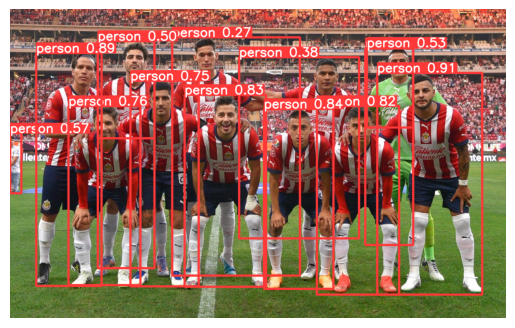

In [4]:
# Load a pretrained YOLOv8n model
model = YOLO("weights/yolov8n.pt")

# Read an image using OpenCV
img = cv2.imread("in/chivas.jpg")

# Run inference on the source image
results = model(img) 
# print(results)

# Display the image with the detected objects
for r in results:
    output = r.plot()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.show()


### Misc Tests

Youtube Videos

In [3]:
# Load a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Define source as YouTube video URL
source = "https://youtu.be/LNwODJXcvt4"

# Run inference on the source
results = model(source, stream = True, save = True)

In [ ]:
frames = []
for r in results:

    if len(r.boxes) > 0 and r.boxes.conf[0] > 0.5 and np.random.rand() > 0.5 and len(frames) < 5:
       frames.append(r)

    if len(frames) == 5:
        frames.remove(frames[np.random.randint(0, 5)])

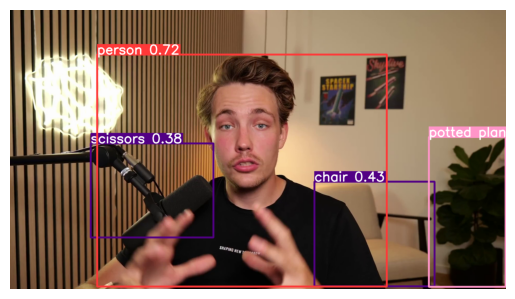

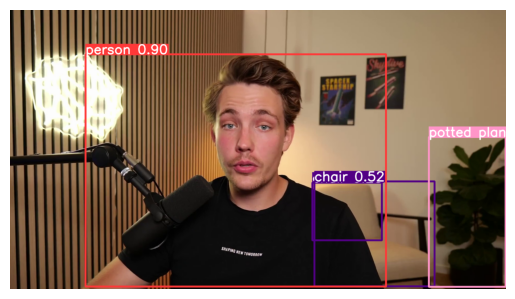

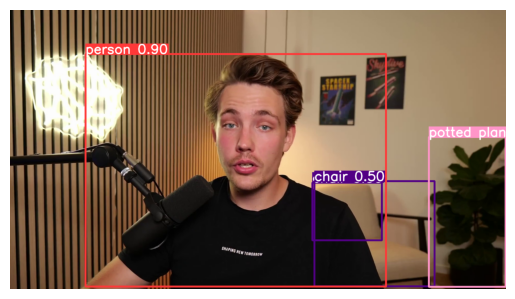

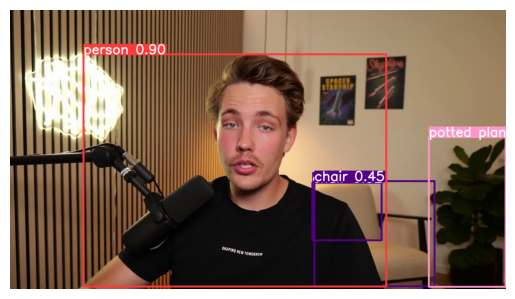

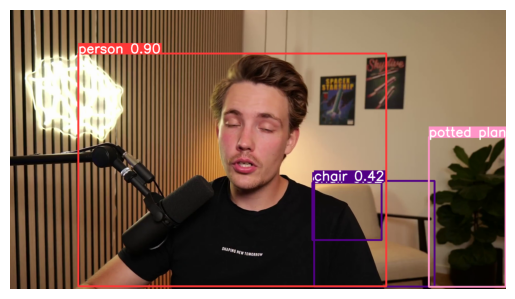

In [6]:
for f in frames:
    plt.axis('off')
    plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
    plt.show()

Videos

In [ ]:
# show video using OpenCV
cap = cv2.VideoCapture('in/you_should_come_over.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()

    if not ret:
        break
    
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [38]:
# Load a pretrained YOLOv8n model
model = YOLO("weights/yolov8n.pt")

# Define source as YouTube video URL
source = 'in/you_should_come_over.mp4'

# Run inference on the source
results = model(source, stream = True, save = True)

In [ ]:
frames = []
for r in results:

    if len(r.boxes) > 0 and r.boxes.conf[0] > 0.5 and np.random.rand() > 0.5 and len(frames) < 5:
       frames.append(r)

    if len(frames) == 5:
        frames.remove(frames[np.random.randint(0, 5)])


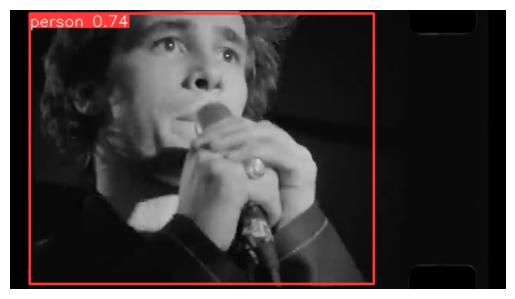

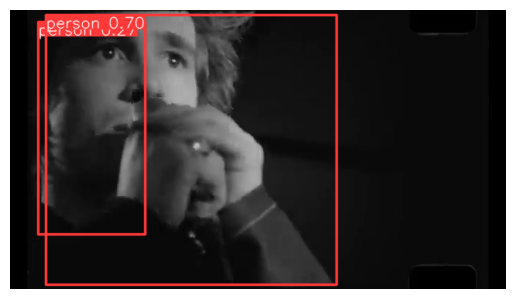

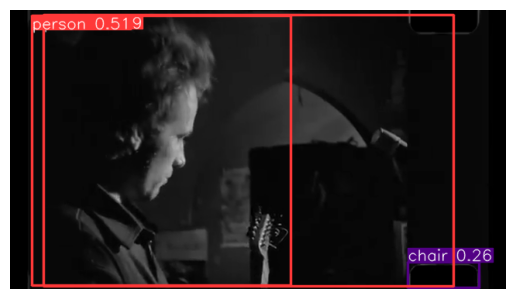

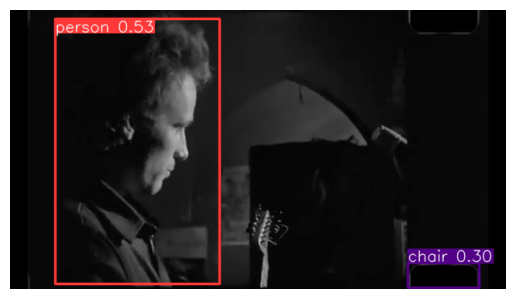

In [42]:
for f in frames:
    plt.axis('off')
    plt.imshow(cv2.cvtColor(f.plot(), cv2.COLOR_BGR2RGB))
    plt.show()

webcam stream

In [ ]:
# webcam example
# from pderrenger @ultalytics

# Load your model
model = YOLO('weights/yolov8n.pt')

# stream video from your webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():

    ret, frame = cap.read()

    if not ret:
        break

    # Predict and skip frames according to vid_stride
    results = model(frame, stream=True, vid_stride=30)
    
    # Check if any objects were detected
    if results:
        for result in results:
            # Process and display results
            annotated_frame = result.plot()
            cv2.imshow("Results", annotated_frame)
    else:
        # If no results, display the original frame
        cv2.imshow("Results", frame)

    if cv2.waitKey(1) == ord('q'):
        break


### Get MSCOCO labels + images

In [43]:
from ultralytics.utils import ASSETS, yaml_load
from ultralytics.utils.checks import check_yaml

CLASSES = yaml_load(check_yaml("coco8.yaml"))["names"]
print(CLASSES)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

### Export models to ONNX

In [28]:
# Load a model
model = YOLO("yolov8n.pt") 

# Get model info
model.info() 

# Export the model to ONNX format
path = model.export(format="onnx")  

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients


Ultralytics YOLOv8.2.18 🚀 Python-3.12.3 torch-2.3.0+cu121 CPU (AMD Ryzen 5 5500U with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

PyTorch: starting from 'yolov8n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (6.2 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 0.5s, saved as 'yolov8n.onnx' (12.2 MB)

Export complete (1.9s)
Results saved to /home/mikel/uaslp/computer_vision/TercerParcial
Predict:         yolo predict task=detect model=yolov8n.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8n.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


In [30]:
# Load a model
model = YOLO("yolov8s.pt")  

# Get model info
model.info() 

# Export the model to ONNX format
path = model.export(format="onnx")  

YOLOv8s summary: 225 layers, 11166560 parameters, 0 gradients


Ultralytics YOLOv8.2.18 🚀 Python-3.12.3 torch-2.3.0+cu121 CPU (AMD Ryzen 5 5500U with Radeon Graphics)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients

PyTorch: starting from 'yolov8s.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (21.5 MB)

ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 0.8s, saved as 'yolov8s.onnx' (42.8 MB)

Export complete (2.3s)
Results saved to /home/mikel/uaslp/computer_vision/TercerParcial
Predict:         yolo predict task=detect model=yolov8s.onnx imgsz=640  
Validate:        yolo val task=detect model=yolov8s.onnx imgsz=640 data=coco.yaml  
Visualize:       https://netron.app


### References

- https://github.com/ultralytics/ultralytics/tree/main?tab=readme-ov-file
- https://docs.ultralytics.com/modes/predict/#inference-arguments